In [104]:
import pandas as pd
from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression,HuberRegressor,TheilSenRegressor,RANSACRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error,r2_score,mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error as RMSE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
import numpy as np


In [105]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
subm = pd.read_csv('sample_submission.csv')
df.head()


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,0.5500,0.4125,0.1625,1.715145,0.609514,0.396893,0.566990,4.0
1,1,F,1.5125,1.2125,0.4000,31.312023,13.395139,6.265239,8.930093,10.0
2,2,F,1.5125,1.1750,0.4125,31.552993,14.670866,6.279414,9.922325,11.0
3,3,I,0.8000,0.6000,0.2000,4.620969,3.019222,0.978058,1.417475,7.0
4,4,I,1.3875,1.0875,0.3625,24.323871,11.651644,5.712424,5.386405,8.0


In [106]:
X = df.drop(columns='Age',axis=1)
y = df['Age']

# Heatmap 

<Axes: >

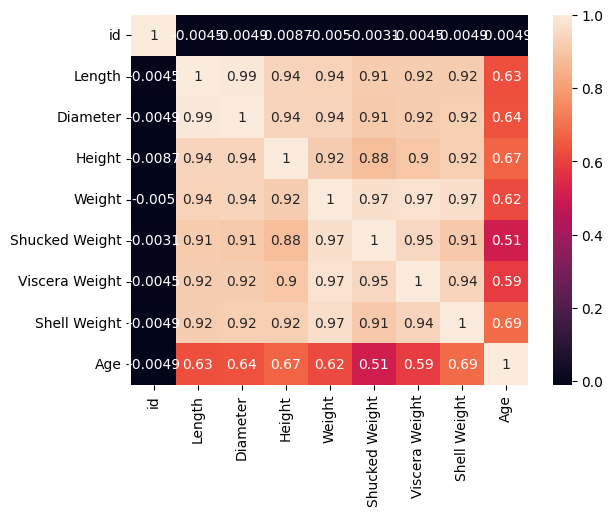

In [107]:
sns.heatmap(df.drop(columns='Sex').corr(),annot=True)

# create X & y and split them into train and test

In [108]:
cols = ['Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight']
X = df[cols]
y = df['Age']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30,random_state=42)

# First Linear Sample regrassion

In [109]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mean_squared_error(y_test,y_pred)


4.343653273387253

# One hot encoding

In [110]:
df = pd.get_dummies(df,columns=['Sex'],dtype=int)
df = df.reset_index(drop=True)

test = pd.get_dummies(test,columns=['Sex'],dtype=int)
test = test.reset_index(drop=True)

In [111]:
cols = ['Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight','Sex_F','Sex_I','Sex_M']
X = df[cols]
y = df['Age']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30,random_state=42)

## Linear Regrassion after one hot encoding

In [112]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mean_absolute_error(y_test,y_pred)

1.4004870832012453

## Ridge

In [113]:
hub_reg = Ridge(alpha=1.0)
hub_reg.fit(X_train,y_train)
hub_y_pred = hub_reg.predict(X_test)

mean_absolute_error(y_test,hub_y_pred)

1.4001498767046145

## Lasso

In [114]:
hub_reg = Lasso(alpha=0.01)
hub_reg.fit(X_train,y_train)
hub_y_pred = hub_reg.predict(X_test)

mean_absolute_error(y_test,hub_y_pred)

1.4175439159920216

In [115]:
hub_reg = HuberRegressor()
hub_reg.fit(X_train,y_train)
hub_y_pred = hub_reg.predict(X_test)

mean_absolute_error(y_test,hub_y_pred)

/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


1.3656137682126734

## TheilSenRegressor

In [116]:
hub_reg = TheilSenRegressor()
hub_reg.fit(X_train,y_train)
hub_y_pred = hub_reg.predict(X_test)

mean_absolute_error(y_test,hub_y_pred)

1.3748233176143994

## RANSACRegressor

In [117]:
hub_reg = RANSACRegressor()
hub_reg.fit(X_train,y_train)
hub_y_pred = hub_reg.predict(X_test)

mean_absolute_error(y_test,hub_y_pred)

1.4660876104532892

## ensemle_method

In [118]:
# Define base models as pipelines
linear_pipeline = Pipeline([('scaler', StandardScaler()),
                            ('model', LinearRegression())])

ridge_pipeline = Pipeline([('scaler', StandardScaler()),
                           ('model', Ridge(alpha=1.0))])

huber_pipeline = Pipeline([('scaler', StandardScaler()),
                          ('model', HuberRegressor())])

theil_pipeline = Pipeline([('scaler', StandardScaler()),
                           ('model', TheilSenRegressor())])

# Combine models using VotingRegressor for blending
voting_regressor = VotingRegressor(estimators=[
    ('linear', linear_pipeline),
    ('ridge', ridge_pipeline),
    ('huber', huber_pipeline),
    ('theil', theil_pipeline),
    # ('ransac', ransac_pipeline)
])

# Train the ensemble model
voting_regressor.fit(X_train, y_train)


VotingRegressor(estimators=[('linear',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model', LinearRegression())])),
                            ('ridge',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model', Ridge())])),
                            ('huber',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model', HuberRegressor())])),
                            ('theil',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model', TheilSenRegressor())]))])

In [119]:
ensembel_pred = voting_regressor.predict(X_test)
mean_absolute_error(y_test,ensembel_pred)

1.377202838314177

In [120]:

# Predict using the blended model
y_pred_blend = voting_regressor.predict(X_test)

# Evaluate the blended predictions
rmse_blend = np.sqrt(mean_squared_error(y_test, y_pred_blend))
mae_blend = mean_absolute_error(y_test, y_pred_blend)
median_ae_blend = median_absolute_error(y_test, y_pred_blend)
mape_blend = mean_absolute_percentage_error(y_test, y_pred_blend)
r2_blend = r2_score(y_test, y_pred_blend)

# Store results for comparison
results_blend = {
    'Model': 'Blending (VotingRegressor)',
    'RMSE': rmse_blend,
    'MAE': mae_blend,
    'MedianAE': median_ae_blend,
    'MAPE': mape_blend,
    'R2': r2_blend
}

# Display the results
results_df = pd.DataFrame([results_blend])
results_df


,Model,RMSE,MAE,MedianAE,MAPE,R2
0,Blending (VotingRegressor),2.07195,1.377203,0.945845,0.132944,0.591713


In [137]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias =True)


poly_features = polynomial_converter.fit(X)
poly_features = polynomial_converter.transform(X)

X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.3,random_state=42)


# Pipline

In [138]:
from sklearn.pipeline import Pipeline

# Create a pipeline with standard scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', HuberRegressor())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Pipeline(steps=[('scaler', StandardScaler()), ('regressor', HuberRegressor())])

In [139]:
y = pipeline.predict(X_test)
mean_absolute_error(y_test,y)

1.3377014566790733

In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

# Separate features and target variable
X = df.drop(columns=['id', 'Age'])
y = df['Age']

# Identify numeric and categorical features
numeric_features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('poly', PolynomialFeatures(degree=2, include_bias=True)),  # Add polynomial features
            ('scaler', StandardScaler())] 
        ), numeric_features)
    ])

# Create a pipeline with the Huber Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', HuberRegressor())
])

# Cross-validation predictions
y_pred = cross_val_predict(pipeline, X, y, cv=5)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y, y_pred)

print(f"Mean Absolute Error: {mae}")


/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

Mean Absolute Error: 1.3404485888811921


/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.3404485888811921


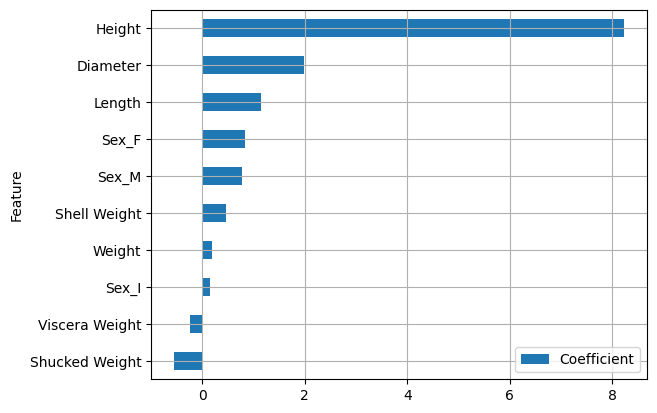

In [ ]:
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=True)
coefficients_df.plot(kind='barh', x='Feature', y='Coefficient',legend=True)
plt.grid()

In [159]:
df

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_Diameter,Sex_F,Sex_I,Sex_M
0,0,0.5500,0.4125,0.1625,1.715145,0.609514,0.396893,0.566990,4.0,0,0,1,0
1,1,1.5125,1.2125,0.4000,31.312023,13.395139,6.265239,8.930093,10.0,0,1,0,0
2,2,1.5125,1.1750,0.4125,31.552993,14.670866,6.279414,9.922325,11.0,0,1,0,0
3,3,0.8000,0.6000,0.2000,4.620969,3.019222,0.978058,1.417475,7.0,0,0,1,0
4,4,1.3875,1.0875,0.3625,24.323871,11.651644,5.712424,5.386405,8.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,1.3750,1.0625,0.3500,24.734939,11.169703,6.208540,6.095142,9.0,0,0,0,1
14996,14996,1.0750,0.8125,0.2500,12.998246,5.896696,2.338834,2.919999,7.0,0,0,1,0
14997,14997,1.3750,1.1125,0.3625,23.544260,8.674947,4.791066,7.796112,15.0,0,0,1,0
14998,14998,1.4375,1.1125,0.3500,28.448723,14.571643,6.279414,6.803880,10.0,0,0,0,1


In [164]:
cols = ['Length','Diameter','Weight','Height','Shucked Weight','Viscera Weight','Shell Weight','Sex_F','Sex_I','Sex_M']
X = df[cols]
y = df['Age']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [165]:
model = HuberRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mean_absolute_error(y_test,y_pred)

/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


1.3654271167096195

In [166]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias =True)


poly_features = polynomial_converter.fit(X)
poly_features = polynomial_converter.transform(X)

X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.3,random_state=42)


In [168]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mean_absolute_error(y_test,y_pred)

1.3539637022324214

## Blending

In [171]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, RANSACRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

huber_pipeline = Pipeline([('scaler', StandardScaler()),
                          ('model', HuberRegressor(alpha= 0.1,epsilon = 1.4))])


linear_pipeline = Pipeline([('scaler', StandardScaler()),
                            ('model', LinearRegression(fit_intercept=True,))])

ridge_pipeline = Pipeline([('scaler', StandardScaler()),
                            ('model', Ridge(alpha=0.1, solver='sparse_cg'))])


# Combine models using VotingRegressor for blending
voting_regressor = VotingRegressor(estimators=[
    ('linear', linear_pipeline),
    ('huber', huber_pipeline),
    ('ridge', ridge_pipeline),
    

])

# Train the ensemble model
voting_regressor.fit(X_train, y_train)


/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


VotingRegressor(estimators=[('linear',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model', LinearRegression())])),
                            ('huber',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              HuberRegressor(alpha=0.1,
                                                             epsilon=1.4))])),
                            ('ridge',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              Ridge(alpha=0.1,
                                                    solver='sparse_cg'))]))])

In [172]:
vot_predict = voting_regressor.predict(X_test)
mean_absolute_error(y_test,vot_predict)

1.3232176615624824

In [173]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, RANSACRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.datasets import make_regression

# Define base models as pipelines
linear_pipeline = Pipeline([('model', LinearRegression(fit_intercept=True))])
huber_pipeline = Pipeline([('model', HuberRegressor(alpha= 0.1,epsilon = 1.4))])



# Define the meta-model
meta_model = HuberRegressor()

# Create the stacking regressor with passthrough
stacking_regressor = StackingRegressor(
    estimators=[
        ('huber', huber_pipeline),
        ('linear', linear_pipeline),
        
    
    ],
    final_estimator=meta_model,
    cv=5,
    passthrough=False  # Include original features in the meta-model
)

# Train the stacking model
stacking_regressor.fit(X_train, y_train)


/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

StackingRegressor(cv=5,
                  estimators=[('huber',
                               Pipeline(steps=[('model',
                                                HuberRegressor(alpha=0.1,
                                                               epsilon=1.4))])),
                              ('linear',
                               Pipeline(steps=[('model',
                                                LinearRegression())]))],
                  final_estimator=HuberRegressor())

In [174]:
good = stacking_regressor.predict(X_test)
mean_absolute_error(y_test,good)

1.3261253158719795